In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
import os

plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util
from tf_unet import opends

In [3]:
import tensorflow as tf

def total_parameters():
    total_par = 0
    for variable in tf.trainable_variables():
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_par += variable_parameters
    return total_par

def bgr2rgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def rgb2bgr(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

In [4]:
# dp = image_gen.OpendsDataProvider('../db_opends/train_npy/*', data_suffix='.png', mask_suffix='.npy')
dp = opends.OpendsDataProvider('../db_opends/train_L/*', data_suffix='.png', mask_suffix='_L.png')

Number of files used: 421
Number of channels: 3
Number of classes: 4


In [5]:
im, lb = dp(1)

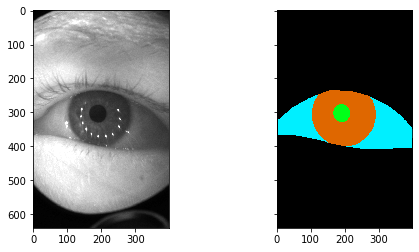

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(im[0,...])
ax[1].imshow(bgr2rgb(lb[0,...]))

In [7]:
net = unet.Unet(channels=dp.channels, n_class=dp.channels, layers=3, features_root=16)

W0819 14:43:59.810545 140506570729280 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:189: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0819 14:43:59.811544 140506570729280 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:194: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 14:43:59.846222 140506570729280 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/layers.py:25: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0819 14:43:59.879853 140506570729280 deprecation.py:506] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/layers.py:39: calling 

In [8]:
trainer = unet.Trainer(net, optimizer="adam", opt_kwargs=dict(learning_rate=0.001))

In [10]:
print("This model has %d trainable parameters"% (total_parameters()))

This model has 117075 trainable parameters


In [ ]:
path = trainer.train(dp, "./unet_trained", training_iters=64, epochs=20, display_step=1)

W0819 14:42:25.076126 140419507275584 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:360: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0819 14:42:25.087182 140419507275584 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:346: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0819 14:42:25.664646 140419507275584 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet.py:367: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0819 14:42:25.666510 140419507275584 deprecation_wrapper.py:119] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/unet

In [12]:
x_test, y_test = dp(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

W0819 00:56:00.476905 140647022327616 deprecation.py:323] From /home/choppy/anaconda3/envs/tf_unet/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


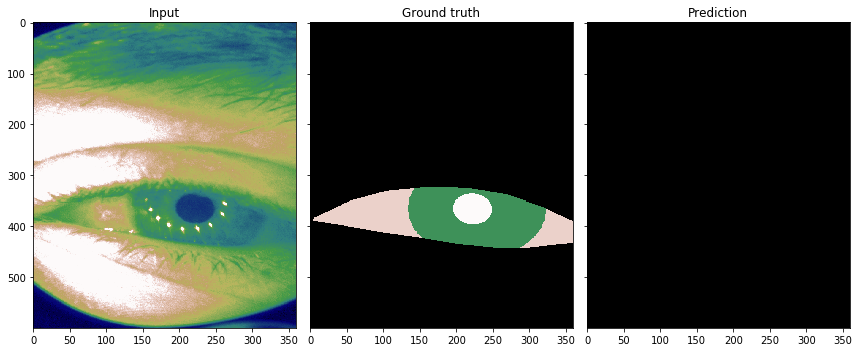

In [13]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")

In [27]:
np.unique(prediction[0,...])

array([4.0297473e-06, 9.9999189e-01], dtype=float32)